In [9]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd

In [10]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/temp_0720/'
replicate='lc_nsms_20_6_14-19-2-2722-642861003/'
filename='MD_Cart_WDH.csv'
oFile='ComponentsNumber.csv'
filepath=repository+replicate+filename

In [11]:
# Import data from csv (evolved robots)
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[:-1]) # Last character is empty for some reason

In [5]:
# Estimate average for each generation
population = 25
evaluations = len(my_list)
#evaluations = 22000
featureSize = len(my_list[0])
generations = int(evaluations / population)

interval=25
rangeValues = range(0,evaluations,interval)
lenRange = len(rangeValues)

print("Number of evaluations: ", evaluations, "Features size: ", featureSize, "Generations: ", generations)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array

Number of evaluations:  30025 Features size:  9 Generations:  1201


In [6]:

organs = []
intervals = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in range(4):
    organNumber = []
    for j in intervals:
        organNumber.append(sum(dat[:,5+i]==j))
        
    organs.append(organNumber)
print()

In [8]:
wheel = dat[:,5]>0
sensor = dat[:,6]>0
joint = dat[:,7]>0
#print(tempDat[:5])
tempDat = dat[wheel&sensor]
print(len(tempDat))
tempDat = dat[(wheel|joint)&sensor]
print(len(tempDat))
tempDat = dat[joint&sensor]
print(len(tempDat))
#tempDat = dat[dat[:,5]>0 & dat[:,6]>0]

1497
3784
2709


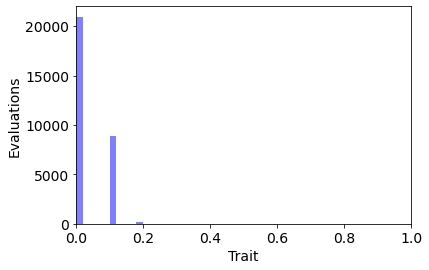

In [6]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

num_bins = 10
n, bins, patches = plt.hist(dat[:,8], num_bins, facecolor='blue', alpha=0.5)

plt.xlabel('Trait')
plt.ylabel('Evaluations')

axes = plt.gca()
axes.set_xlim([0,1.0])
plt.savefig(repository+replicate+'histTraitWheels.png',dpi=200)

In [7]:
# Save to CSV
with open(repository + replicate + oFile, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    for i in range(4):
        csv_writer.writerow(organs[i][:])